In [ ]:
Dir_Main = "/Users/seanlin/Desktop/Python for AAE 625/Class 625/AAE625_25/Week_1"
# Import the MEHOINUSA646N.csv and cpi_annaul.csv in the Dir_Main:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
df_income = pd.read_csv(Dir_Main + "/MEHOINUSA646N.csv")
df_cpi = pd.read_csv(Dir_Main + "/cpi_annual.csv")
# cpi data saved in the Dir_Main folder, named as cpi_annual.csv
df_cpi = pd.read_csv(Dir_Main + "/cpi_annual.csv")
# Change column names: observation_date: Date, MEHOINUSA646N: Nominal_income
df_income.columns = ['Date', 'Nominal_income']
# Change the Date to datetime format
df_income['Date'] = pd.to_datetime(df_income['Date'])
df_income['Year'] = df_income['Date'].dt.year
# Change column names: observation_date: Date, cpi: CPI
df_cpi.columns = ['Date', 'CPI']
df_cpi['Year'] = df_cpi['Date'].str[:4].astype(int)

# Create the 'CPI_base2020' column in df_cpi
# The value of CPI_base2020 is the CPI value in 2020
df_cpi['CPI_base2020'] = df_cpi.loc[df_cpi['Year'] == 2020, 'CPI'].values[0]
# Create the 'PriceIndex' column in df_cpi
df_cpi['PriceIndex'] = df_cpi['CPI'] / df_cpi['CPI_base2020'] *100

# Merge df_income and df_cpi
df_merge = pd.merge(df_income, df_cpi, on='Year', how='inner')
df_merge['Real_income'] = df_merge['Nominal_income'] / df_merge['PriceIndex'] *100
df_merge.tail()


,Date_x,Nominal_income,Year,Date_y,CPI,CPI_base2020,PriceIndex,Real_income
35,2019-01-01,68700,2019,2019-01-01,255.653,258.846,98.766448,69558.034523
36,2020-01-01,68010,2020,2020-01-01,258.846,258.846,100.000000,68010.000000
37,2021-01-01,70780,2021,2021-01-01,270.966,258.846,104.682321,67614.091362
38,2022-01-01,74580,2022,2022-01-01,292.621,258.846,113.048299,65971.802024
39,2023-01-01,80610,2023,2023-01-01,304.701,258.846,117.715167,68478.856518


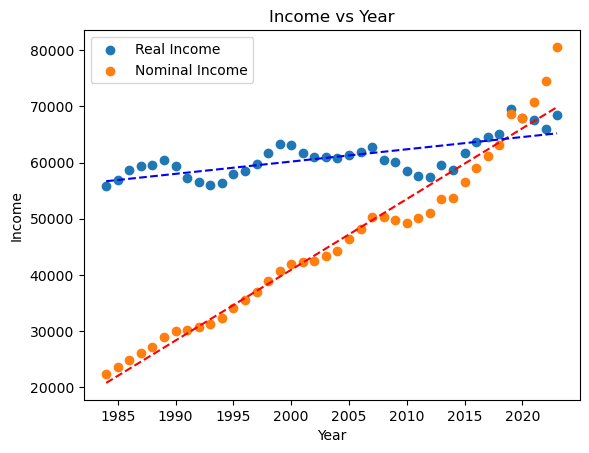

In [9]:
# Create a scatter plot of the real income and nominal income; the x-axis is the year and the y-axis is the income
plt.scatter(df_merge['Year'], df_merge['Real_income'], label='Real Income')
plt.scatter(df_merge['Year'], df_merge['Nominal_income'], label='Nominal Income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income vs Year')
plt.legend()

# Add the trendline:
# Nominal Income
# add the trend lines in the same figure
z = np.polyfit(df_merge['Year'], df_merge['Nominal_income'], 1)
p = np.poly1d(z)
plt.plot(df_merge['Year'], p(df_merge['Year']), "r--", label='Nominal_income_trendline')
# Real Income
z = np.polyfit(df_merge['Year'], df_merge['Real_income'], 1)
p = np.poly1d(z)
plt.plot(df_merge['Year'], p(df_merge['Year']), "b--", label='Real_income_trendline')
plt.show()